<a href="https://colab.research.google.com/github/vasubajaj7/DataScienceAcaddemy/blob/main/ML/LinearRegression_Recall_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [102]:
from utility import Utility

utils = Utility()
utils.create_requirements_file(['numpy', 'pandas', 'scikit-learn', 'matplotlib'])

In [92]:
#!pip freeze

In [94]:
# Ref - https://janakiev.com/blog/python-shell-commands/

import subprocess
def _get_pylib_details(modules):
  env = []
  process = subprocess.Popen(['pip', 'freeze'],
                      stdout=subprocess.PIPE, 
                      universal_newlines=True)
  for _module in list(process.communicate()):
    if _module is not None:
      for lib_name in _module.splitlines():
        if lib_name.split("==")[0] in modules:
          env.append(lib_name)
  return env

with open('requirements.txt', 'w') as f:
  for module in  _get_pylib_details(['numpy', 'pandas', 'scikit-learn', 'matplotlib']):
    f.write(module+"\n")


In [96]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:


# read data
# peform EDA
# train and split data
# predict
# measure accuracy

# Read Data and perform EDA

In [103]:
# Read Data

df = pd.read_csv("50_startups.csv", sep=",")
df.head()
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [104]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [106]:
df.columns.to_list()

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

## rename column to eliminate special_character and space

In [107]:
#rename column to eliminate special_character and space
new_colnames=[]
for col in df.columns:
  new_colnames.append(col.lower().replace(" ", "_").replace("&", ""))

df.columns = new_colnames
df.columns

Index(['rd_spend', 'administration', 'marketing_spend', 'state', 'profit'], dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rd_spend         50 non-null     float64
 1   administration   50 non-null     float64
 2   marketing_spend  50 non-null     float64
 3   state            50 non-null     object 
 4   profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [109]:
for col in df.columns:
  if df[col].dtype =='float64':
    df[col].fillna(0.0, inplace=True)
  elif df[col].dtype =='int64':
    df[col].replace(None, 0)

In [110]:
df.shape

(50, 5)

In [111]:
df.describe()

,rd_spend,administration,marketing_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## PairGrid

Seeing the Pairwise Plot to determine the basic relationship among variables. Complememted with the correlation plot this becomes very useful to interpret the feature and target relation.

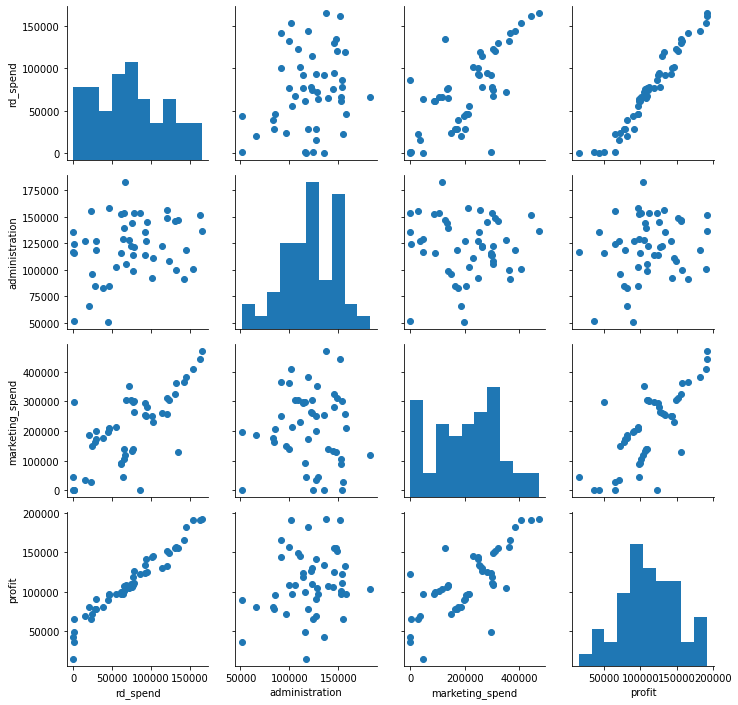

In [112]:
pairgrid = sns.PairGrid(df[df.columns])
pairgrid.map_diag(plt.hist)
pairgrid.map_offdiag(plt.scatter)

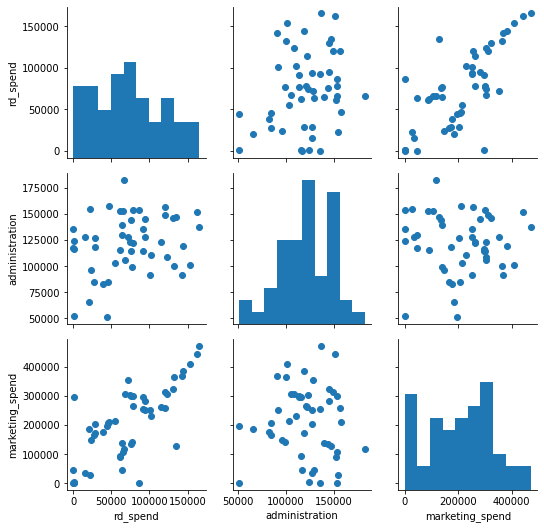

In [113]:
#Hard Code Example:
g = sns.PairGrid(df[[ 'rd_spend', 'administration', 'marketing_spend', 'state']])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [114]:
# pairplot
#sns.pairplot(df, x_vars=df.columns.to_list()[:-1], y_vars=[df.columns.to_list()[-1]], height=5, aspect=.8, kind="reg");

In [115]:
df.columns.to_list()

['rd_spend', 'administration', 'marketing_spend', 'state', 'profit']

In [116]:
df.columns.to_list()[:-1]

['rd_spend', 'administration', 'marketing_spend', 'state']

In [117]:
[df.columns.to_list()[-1]]

['profit']

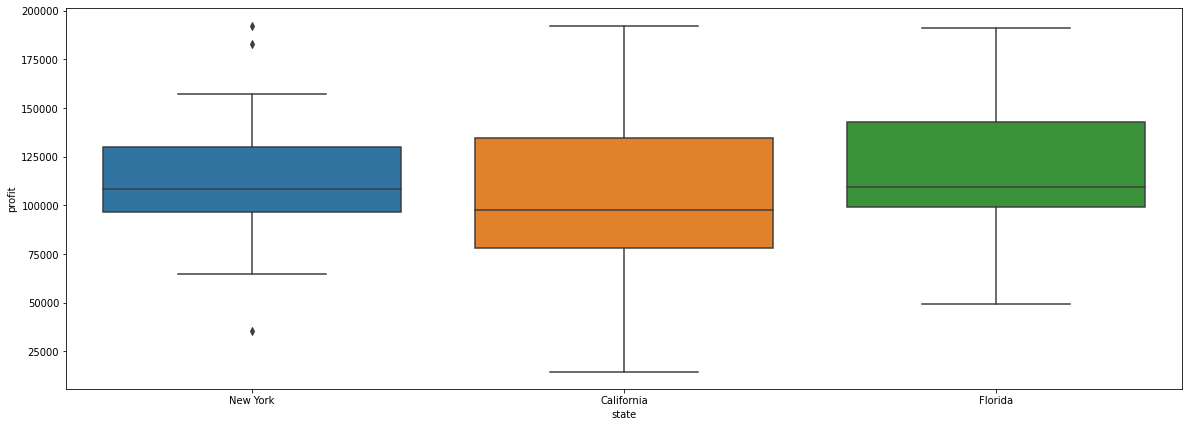

In [118]:
## boxplot for categorical variables
fig, (ax1) = plt.subplots(1,1,figsize=(20,7))
sns.boxplot(x="state", y="profit", data=df , ax = ax1)


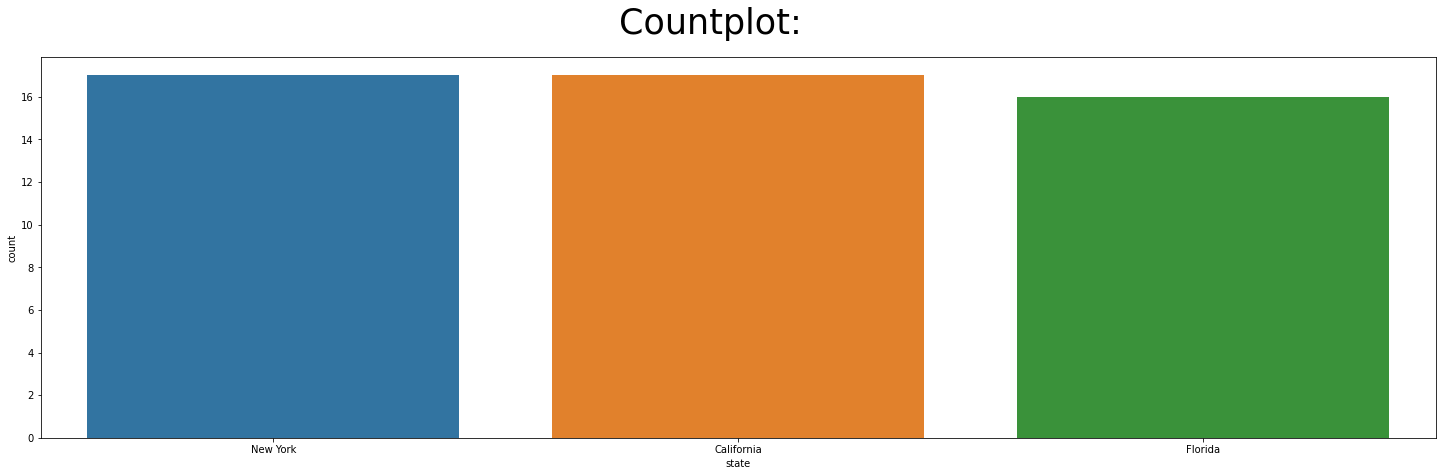

In [119]:
## Countplot for categorical variables
fig, (ax1) = plt.subplots(1,1,figsize=(25,7))

fig.suptitle("Countplot: ", fontsize=35)

sns.countplot(x="state", data=df,ax=ax1)

In [120]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

<ipython-input-120-acdb9608aa81>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,rd_spend,administration,marketing_spend,profit
rd_spend,1.00,0.24,0.72,0.97
administration,0.24,1.00,-0.03,0.20
marketing_spend,0.72,-0.03,1.00,0.75
profit,0.97,0.20,0.75,1.00


The correlation matrix is very useful in Linear Regression. We know that if there is correlation between the varibles then then beta values do not make sense. We must choose only one of the highly correlated variables.

In [121]:
## Declaring the variables
iv=df[df.columns.to_list()[:-1]]
dv=df[df.columns.to_list()[-1]]

In [122]:
## Creating the dummy variables 
iv=pd.get_dummies(iv)

In [123]:
iv.columns = [col.lower().replace(' ',"_") for col in iv.columns.to_list()]
iv.columns

Index(['rd_spend', 'administration', 'marketing_spend', 'state_california',
       'state_florida', 'state_new_york'],
      dtype='object')

In [124]:
# dropping of columns to avoid dummy variable trap
iv=iv.drop(['state_new_york'], axis=1)

In [125]:
## Dividing the Dataset into Test and Train
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,test_size=0.3,random_state=0)

In [126]:
## Implementing Linear Regression
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(iv_train,dv_train)

LinearRegression()

In [127]:
## Seeing the result of Linear Regression
import statsmodels.api as sm
X2 = sm.add_constant(iv_train)
est = sm.OLS(dv_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           3.78e-18
Time:                        13:01:17   Log-Likelihood:                -370.11
No. Observations:                  35   AIC:                             752.2
Df Residuals:                      29   BIC:                             761.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.271e+04   9650.459  

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [128]:
## Predictiions for TEST
y_pred=regressor.predict(iv_test)
## Seeing the Predictions
type(y_pred)

numpy.ndarray

In [130]:
validate=pd.DataFrame({'y_test': dv_test ,'y_pred': y_pred}, columns= ['y_test', 'y_pred'] )
validate['diff'] = validate.y_test - validate.y_pred
validate

,y_test,y_pred,diff
28,103282.38,104282.764722,-1000.384722
11,144259.40,132536.884992,11722.515008
10,146121.95,133910.850078,12211.099922
41,77798.83,72584.774894,5214.055106
2,191050.39,179920.927619,11129.462381
27,105008.31,114549.310792,-9541.000792
38,81229.06,66444.432613,14784.627387
31,97483.56,98404.968401,-921.408401
22,110352.25,114499.828086,-4147.578086
4,166187.94,169367.506399,-3179.566399


What is the correlation coefficient(approx) between Profit and administration spend on the train set?
0.83
0.64
0.2
0.54


In [87]:
iv_train.corr()

,rd_spend,administration,marketing_spend,state_california,state_florida
rd_spend,1.000000,0.364944,0.735911,-0.167359,-0.009799
administration,0.364944,1.000000,0.110625,-0.119167,0.075845
marketing_spend,0.735911,0.110625,1.000000,-0.162961,0.174715
state_california,-0.167359,-0.119167,-0.162961,1.000000,-0.433013
state_florida,-0.009799,0.075845,0.174715,-0.433013,1.000000


In [88]:
iv_train

,rd_spend,administration,marketing_spend,state_california,state_florida
7,130298.13,145530.06,323876.68,0,1
14,119943.24,156547.42,256512.92,0,1
45,1000.23,124153.04,1903.93,0,0
48,542.05,51743.15,0.00,0,0
29,65605.48,153032.06,107138.38,0,0
15,114523.61,122616.84,261776.23,0,0
30,61994.48,115641.28,91131.24,0,1
32,63408.86,129219.61,46085.25,1,0
16,78013.11,121597.55,264346.06,1,0
42,23640.93,96189.63,148001.11,1,0
